##### Задача №1

Целевая функция учитывает стоимость и вес товара:

$F(X) = \sum_{i = 1}^{2000} x_i k^2 \frac{с_i}{w_i} \rightarrow max$

$x_i$ - 0 или 1 i-ой позиции  
$w_i$ - вес i-ой позиции  
$c_i$ - цена i-ой позиции  
k - коэфициент "важности" цены по отношению к весу

С ограничением 

$\sum_{i = 1}^{2000} x_i w_i \leqslant 200$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
w = np.array([random.randint(1, 151) for x in range(2000)])
c = np.array([random.randrange(100, 5001, 100) for x in range(2000)])
np.random.shuffle(w)
np.random.shuffle(c)

In [3]:
df = pd.DataFrame({'weight': w, 'cost': c})

Text(0.5, 1.0, 'K = 1')

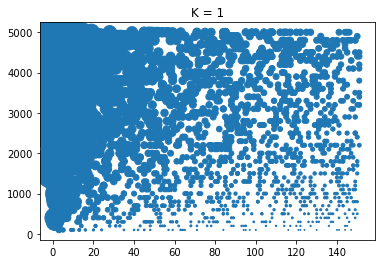

In [4]:
k = 1
s = (k**2)*c/w
plt.scatter(w, c, s);
plt.title(f'K = {k}')

Text(0.5, 1.0, 'K = 0.5')

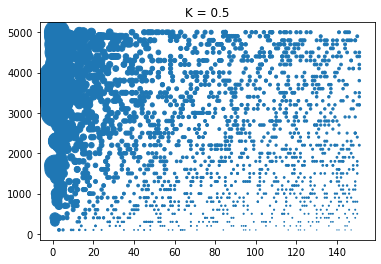

In [5]:
k = 0.5
s = (k**2)*c/w
plt.scatter(w, c, s);
plt.title(f'K = {k}')

In [6]:
df['target'] = s
df['x'] = [0]*2000

Думаю, что логично предположить, что для данной функции, оптимальным решением будет взять сумму элементов с максимальным s.  
И дополнить до веса в 200кг.

In [7]:
df = df.sort_values(by=['target'], ascending=False)

In [8]:
df.head(4)

,weight,cost,target,x
928,1,3900,975.0,0
1261,1,3700,925.0,0
130,1,3500,875.0,0
317,1,3300,825.0,0


In [9]:
df.tail(4)

,weight,cost,target,x
83,140,100,0.178571,0
1618,141,100,0.177305,0
1282,144,100,0.173611,0
1705,147,100,0.170068,0


In [10]:
def get_weight(dff):
    _sum = 0

    for index, row in dff.iterrows():
        if _sum + row['weight'] <= 200:
            dff.at[index,'x'] = 1
            _sum += row['weight']
    
    return dff

In [11]:
df_1 = get_weight(df.copy())

In [12]:
selected = df_1[df_1['x'] == 1]
selected

,weight,cost,target,x
928,1,3900,975.000000,1
1261,1,3700,925.000000,1
130,1,3500,875.000000,1
317,1,3300,825.000000,1
1077,1,3200,800.000000,1
375,1,3000,750.000000,1
1373,2,5000,625.000000,1
923,2,4900,612.500000,1
1008,2,4700,587.500000,1
604,2,4500,562.500000,1


In [13]:
selected.sum()

weight       200.000000
cost      195900.000000
target     19142.619048
x             57.000000
dtype: float64

##### Задача №2

не успел =/